# Librerías necesarias

In [148]:
!pip install gensim
!pip install pyLDAvis

In [149]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from sklearn.utils import shuffle
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# Ejemplo con Reviews de Asistentes Virtuales

# Lectura de datos

In [150]:
df = pd.read_json('../../archivos/Automotive_5.json',lines=True)
df2 = pd.read_json('../../archivos/Video_Games_5.json',lines=True)
df3 = pd.read_json('../../archivos/Baby_5.json',lines=True)
df4 = pd.read_json('../../archivos/Home_and_Kitchen_5.json',lines=True)

In [151]:
df=df[:10000]
print('el df tiene',df.shape)
df2=df2[:10000]
print('el df2 tiene',df2.shape)
df3=df3[:10000]
print('el df3 tiene',df3.shape)
df4=df4[:10000]
print('el df4 tiene',df4.shape)

el df tiene (10000, 9)
el df2 tiene (10000, 9)
el df3 tiene (10000, 9)
el df4 tiene (10000, 9)


### Unimos los datasets y los mezclamos

In [152]:
df=pd.concat([df, df2, df3, df4], axis=0)
df = shuffle(df)

In [153]:
df.shape

(40000, 9)

In [154]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
9545,AEX96S68S8OTG,B00004S1B8,"Joseph J. Zielinski ""John""","[0, 0]",This sharpener is an outstanding sharpener pro...,5,Chef's Choice 120,1346544000,"09 2, 2012"
6051,A2LIQIR5CQ2LFV,B000067PIZ,Lou A. Deroux,"[0, 0]",These are great to take along so that you don'...,4,These are wonderful,1210809600,"05 15, 2008"
8253,A2UF774IWAD80M,B00004RFMJ,Adrianne Summerfield,"[0, 0]",We had to you-tube this product to discover ho...,5,Nice knife roll,1358121600,"01 14, 2013"
182,A1QOEM8ZQ9FQI7,B000006P0J,"john ""craig173""","[2, 3]",The first time I played this game I was amazed...,4,The game that made namco famous,1022630400,"05 29, 2002"
5492,A2PHXB4LFHO5UZ,B000CIGE9G,Blackace04,"[1, 1]",purchased for my wrangler as a backup since th...,5,great aux trans cooler,1390694400,"01 26, 2014"


In [155]:
df = df[['reviewText']]
df.dropna(inplace=True)

# Preprocesado

In [156]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [157]:
processed_texts = []
for text in df['reviewText']:
    processed_texts.append(text_preprocessing(text))

## Diccionario id - palabra

In [158]:
dictionary = Dictionary(processed_texts)

In [159]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [160]:
list(dictionary.items())

[(0, 'available'),
 (1, 'best'),
 (2, 'brands'),
 (3, 'chef'),
 (4, 'choice'),
 (5, 'company'),
 (6, 'different'),
 (7, 'durable'),
 (8, 'edge'),
 (9, 'extremely'),
 (10, 'forget'),
 (11, 'hand'),
 (12, 'highly'),
 (13, 'knives'),
 (14, 'lifetime'),
 (15, 'like'),
 (16, 'long'),
 (17, 'model'),
 (18, 'motor'),
 (19, 'november'),
 (20, 'outstanding'),
 (21, 'pennsylvania'),
 (22, 'pleased'),
 (23, 'power'),
 (24, 'powerful'),
 (25, 'probably'),
 (26, 'produced'),
 (27, 'puts'),
 (28, 'quality'),
 (29, 'recommended'),
 (30, 'runs'),
 (31, 'sharp'),
 (32, 'sharpened'),
 (33, 'sharpener'),
 (34, 'sharpeners'),
 (35, 'sharpens'),
 (36, 'stones'),
 (37, 'unit'),
 (38, 'update'),
 (39, 'warranty'),
 (40, 'year'),
 (41, 'baggie'),
 (42, 'carry'),
 (43, 'chambers'),
 (44, 'formula'),
 (45, 'great'),
 (46, 'item'),
 (47, 'little'),
 (48, 'place'),
 (49, 'pour'),
 (50, 'premeasured'),
 (51, 'snaps'),
 (52, 'sure'),
 (53, 'tighly'),
 (54, 'times'),
 (55, 'tupperware'),
 (56, 'discover'),
 (57, 'ho

In [161]:
len(dictionary)

49888

## Matriz documento-palabra

In [162]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [163]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 2)],
 [(41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(3, 1),
  (13, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(15, 1),
  (28, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 4),
  (85, 1),
  (86, 3),
  (87, 

## Entrenamos el modelo (LDA) con 4 topics

In [164]:
num_topics = 4

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [165]:
lda_model.show_topics()

[(0,
  '0.008*"good" + 0.008*"battery" + 0.007*"price" + 0.007*"great" + 0.007*"works" + 0.007*"product" + 0.006*"work" + 0.006*"like" + 0.006*"filter" + 0.005*"amazon"'),
 (1,
  '0.018*"baby" + 0.011*"great" + 0.009*"time" + 0.009*"like" + 0.009*"months" + 0.009*"bottles" + 0.008*"little" + 0.008*"bottle" + 0.008*"love" + 0.007*"bought"'),
 (2,
  '0.012*"good" + 0.012*"great" + 0.012*"easy" + 0.012*"like" + 0.008*"clean" + 0.006*"nice" + 0.006*"handle" + 0.006*"product" + 0.006*"works" + 0.006*"time"'),
 (3,
  '0.054*"game" + 0.013*"games" + 0.012*"like" + 0.010*"play" + 0.009*"time" + 0.008*"graphics" + 0.007*"good" + 0.007*"great" + 0.006*"best" + 0.005*"quot"')]

In [166]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn =9)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04
0,good,baby,good,game
1,battery,great,great,games
2,price,time,easy,like
3,great,like,like,play
4,works,months,clean,time
5,product,bottles,nice,graphics
6,work,little,handle,good
7,like,bottle,product,great
8,filter,love,works,best


### Observamos los topics:
#### Topic 1: observamos que se refiere a automoviles
#### Topic 2: observamos que se refiere a bebes.
#### Topic 3: no podemos deducir a que se refiere ya que son palabras muy genericas.
#### Topic 4: observamos que se refiere a videogames

## Entrenamos el modelo (LDA) con 8 topics

In [167]:
num_topics = 8

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [168]:
lda_model.show_topics()

[(0,
  '0.018*"knife" + 0.014*"product" + 0.012*"knives" + 0.012*"pressure" + 0.010*"water" + 0.010*"clean" + 0.010*"wash" + 0.009*"cooker" + 0.009*"spray" + 0.008*"bread"'),
 (1,
  '0.088*"game" + 0.026*"games" + 0.015*"play" + 0.014*"graphics" + 0.011*"like" + 0.009*"best" + 0.009*"characters" + 0.008*"time" + 0.007*"played" + 0.007*"good"'),
 (2,
  '0.029*"bottles" + 0.025*"bottle" + 0.016*"water" + 0.016*"pump" + 0.014*"baby" + 0.013*"diaper" + 0.012*"milk" + 0.010*"nipples" + 0.010*"cream" + 0.010*"wipes"'),
 (3,
  '0.030*"baby" + 0.013*"seat" + 0.012*"months" + 0.011*"daughter" + 0.009*"little" + 0.009*"love" + 0.008*"easy" + 0.008*"chair" + 0.007*"loves" + 0.007*"room"'),
 (4,
  '0.014*"handle" + 0.013*"easy" + 0.012*"cups" + 0.010*"kitchen" + 0.009*"plastic" + 0.009*"clean" + 0.008*"size" + 0.007*"steel" + 0.007*"like" + 0.007*"nice"'),
 (5,
  '0.023*"game" + 0.013*"quot" + 0.007*"like" + 0.006*"level" + 0.005*"time" + 0.004*"different" + 0.004*"weapons" + 0.004*"things" + 0.00

In [169]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn =9)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08
0,knife,game,bottles,baby,handle,game,battery,great
1,product,games,bottle,seat,easy,quot,filter,like
2,knives,play,water,months,cups,like,unit,good
3,pressure,graphics,pump,daughter,kitchen,level,install,time
4,water,like,baby,little,plastic,time,light,bought
5,clean,best,diaper,love,clean,different,power,better
6,wash,characters,milk,easy,size,weapons,charge,little
7,cooker,time,nipples,chair,steel,things,batteries,works
8,spray,played,cream,loves,like,people,tire,product


### Observamos los topics:
#### Topic 1: observamos que se refiere a home and kitchen
#### Topic 2: observamos que se refiere a videogames
#### Topic 3: observamos que se refiere a baby.
#### Topic 4: observamos que se refiere a baby.
#### Topic 5: observamos que se refiere a home and kitchen
#### Topic 6: observamos que se refiere a videogames
#### Topic 7: observamos que se refiere a automotive
#### Topic 8: no podemos deducir a que se refiere ya que son palabras muy genericas.

## Entrenamos el modelo (LDA) con 10 topics

In [170]:
num_topics = 10

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [171]:
lda_model.show_topics()

[(0,
  '0.092*"game" + 0.035*"games" + 0.019*"play" + 0.014*"graphics" + 0.011*"best" + 0.010*"great" + 0.009*"like" + 0.009*"super" + 0.009*"mario" + 0.008*"nintendo"'),
 (1,
  '0.041*"baby" + 0.017*"seat" + 0.015*"months" + 0.014*"daughter" + 0.010*"room" + 0.009*"loves" + 0.009*"little" + 0.008*"month" + 0.008*"child" + 0.008*"gate"'),
 (2,
  '0.053*"bottles" + 0.049*"bottle" + 0.029*"pump" + 0.024*"baby" + 0.021*"milk" + 0.019*"nipples" + 0.017*"avent" + 0.016*"nipple" + 0.014*"water" + 0.013*"flow"'),
 (3,
  '0.027*"like" + 0.027*"time" + 0.013*"good" + 0.010*"think" + 0.010*"thing" + 0.010*"little" + 0.009*"know" + 0.009*"long" + 0.008*"right" + 0.008*"better"'),
 (4,
  '0.058*"game" + 0.011*"play" + 0.008*"like" + 0.007*"graphics" + 0.006*"games" + 0.006*"weapons" + 0.006*"evil" + 0.006*"level" + 0.006*"player" + 0.006*"action"'),
 (5,
  '0.056*"great" + 0.025*"easy" + 0.023*"product" + 0.022*"works" + 0.020*"good" + 0.019*"love" + 0.018*"recommend" + 0.018*"bought" + 0.017*"pri

In [172]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn =9)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10
0,game,baby,bottles,like,game,great,battery,clean,game,handle
1,games,seat,bottle,time,play,easy,filter,water,quot,cups
2,play,months,pump,good,like,product,unit,chair,story,kitchen
3,graphics,daughter,baby,think,graphics,works,cars,easy,characters,knife
4,best,room,milk,thing,games,good,light,cream,final,steel
5,great,loves,nipples,little,weapons,love,install,wash,character,measuring
6,like,little,avent,know,evil,recommend,power,potty,fantasy,pressure
7,super,month,nipple,long,level,bought,vehicle,cleaning,battle,handles
8,mario,child,water,right,player,price,charge,machine,graphics,plastic


### Observamos los topics:
#### Topic 1: observamos que se refiere a videogames.
#### Topic 2: observamos que se refiere a baby.
#### Topic 3: observamos que se refiere a baby.
#### Topic 4: no podemos deducir a que se refiere ya que son palabras muy genericas.
#### Topic 5: observamos que se refiere a videogames.
#### Topic 6: no podemos deducir a que se refiere ya que son palabras muy genericas.
#### Topic 7: observamos que se refiere a automotive.
#### Topic 8: observamos que se refiere a home and kitchen.
#### Topic 9: observamos que se refiere a videogames.
#### Topic 10: observamos que se refiere a home and kitchen.

## Perplexity y Coherence

In [173]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.436057853547908

Coherence Score:  0.573436396959452


In [175]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.064813  0.026507       1        1  23.893789
0     -0.277518 -0.017729       2        1  12.354181
5      0.116120  0.086223       3        1  12.259026
8     -0.270119 -0.009811       4        1  10.052366
...         ...       ...     ...      ...        ...
9      0.156444  0.167261       7        1   7.830867
1      0.133213 -0.159322       8        1   7.362887
7      0.165336  0.067669       9        1   5.231438
2      0.178876 -0.289795      10        1   2.996974

[10 rows x 5 columns], topic_info=          Term          Freq         Total Category  logprob  loglift
84        game  39668.000000  39668.000000  Default  30.0000  30.0000
45       great  15713.000000  15713.000000  Default  29.0000  29.0000
553       baby   6453.000000   6453.000000  Default  28.0000  28.0000
86       games   9771.000000   9771.000000  Default  27.0000  27.0000
...        ...           ...           ...      ...      ...      ...
655       fast    319.653046   1647.742920  Topic10  -5.0951   1.8676
153      clean    367.711792   3950.312988  Topic10  -4.9550   1.1333
634       work    294.589020   4761.248535  Topic10  -5.1767   0.7249
1704  daughter    262.169739   2079.051514  Topic10  -5.2933   1.4369

[608 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1045      2  0.010096  abilities
1045      4  0.989367  abilities
1482      1  0.561854       able
1482      2  0.032241       able
...     ...       ...        ...
1097      2  0.997651      yoshi
1098      2  0.998958      zelda
4293      5  0.998244    zombies
1981      2  0.995150       zone

[1320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 9, 5, 7, 10, 2, 8, 3])

In [176]:
pyLDAvis.save_html(vis, '../results/topics_vis_0.html')

## Número óptimo de topics

In [177]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [178]:
start_ = 2
end_ = 15
step_ = 1

In [179]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

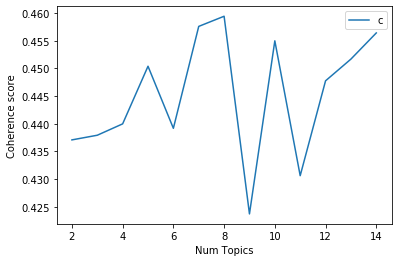

In [180]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [185]:
optimal_model_id = 6

In [196]:
optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(5):
    words = optimal_model.show_topic(i, topn = 9 )
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,sonic,bottles,baby,game,cream
1,leather,baby,great,quot,pressure
2,jack,bottle,like,time,coffee
3,knuckles,battery,little,like,great
4,zone,pump,time,characters,time
5,tails,time,water,play,gate
6,rolling,like,easy,good,bowl
7,horn,milk,months,different,like
8,dash,nipples,product,character,machine


### Observamos los topics:
#### Topic 1 y topic 4: observamos que se refiere a videogames.
#### Topic 2: observamos que se refiere a baby aunque tambien esta la palabra bateria que se refiere a vehicules.
#### Topic 3: observamos que se refiere a baby.
#### Topic 5: observamos que se refiere a home and kitchen.

# Topic dominante por texto

In [197]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [198]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(9)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.7661,"good, great, easy, like, product, works, clean...","[sharpener, outstanding, sharpener, produced, ..."
1,1,1.0,0.4812,"bottles, baby, bottle, battery, pump, time, li...","[great, carry, formula, pour, premeasured, for..."
2,2,2.0,0.5084,"baby, great, like, little, time, water, easy, ...","[tube, product, discover, store, knives, under..."
3,3,6.0,0.9588,"game, games, like, play, graphics, great, good...","[time, played, game, amazed, sheer, quality, c..."
4,4,7.0,0.4448,"good, great, easy, like, product, works, clean...","[purchased, wrangler, backup, trans, runs, tem..."
5,5,7.0,0.6025,"good, great, easy, like, product, works, clean...","[amazon, quickly, helped, exact, truck, engine..."
6,6,7.0,0.6208,"good, great, easy, like, product, works, clean...","[lexol, products, excellant, quality, serves, ..."
7,7,7.0,0.8184,"good, great, easy, like, product, works, clean...","[going, canister, like, friends, eurica, worke..."
8,8,1.0,0.7268,"bottles, baby, bottle, battery, pump, time, li...","[thing, mess, water, coolant, pump, reason, ad..."


# Documento más representativo por topic

In [199]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([
        sent_topics_sorteddf_lda,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9326,"sonic, leather, jack, knuckles, zone, tails, r...","[needed, chamois, chamois, chamois, chamois, c..."
1,1.0,0.9883,"bottles, baby, bottle, battery, pump, time, li...","[spent, money, bottles, pregnant, supposively,..."
2,2.0,0.9912,"baby, great, like, little, time, water, easy, ...","[cloth, diaper, baby, diaper, pail, best, clot..."
3,3.0,0.9837,"game, quot, time, like, characters, play, good...","[starcraft, game, good, game, play, different,..."
4,4.0,0.9865,"cream, pressure, coffee, great, time, gate, bo...","[purchased, cuisinart, coffee, maker, idea, sa..."
5,5.0,0.9914,"game, like, mario, levels, level, games, play,...","[bought, snes, years, super, mario, world, gam..."
6,6.0,0.9904,"game, games, like, play, graphics, great, good...","[final, fantasy, anthology, collection, greate..."
7,7.0,0.9926,"good, great, easy, like, product, works, clean...","[cooking, home, plenty, measuring, cups, plast..."


# Distribución de topics en el corpus

In [200]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

,topic,contribution
0,7.0,0.355150
1,2.0,0.210200
2,6.0,0.148550
3,1.0,0.112250
4,4.0,0.072725
5,3.0,0.056750
6,5.0,0.042025
7,0.0,0.002350


# Conclusión:
## Mi conclusión es que hay muchas palabras genericas y hace muy dificil diferenciar los topics.
## Habria que eliminar esas palabras para que nuestro modelo diferencie mas facilmente los topics.